# Practical 13 - Build a word cloud and perform n-gram analysis on Yelp restaurant reviews. Identify common complaint areas.


In [ ]:
import pandas as pd
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# can be done by simply runnig pd.read_json but dataset is huge so taking lot memory. Hence the below method

file_path = '/content/drive/MyDrive/SMA Practicals/yelp_academic_dataset_review.json'

sampled_lines = []
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        if i % 100 == 0:  # Sample every 100th line
            sampled_lines.append(line)

# Convert sampled lines to DataFrame
df_sampled = pd.read_json(''.join(sampled_lines), lines=True)
df_sampled = df_sampled[df_sampled['stars'] <= 2]  # Filter negative reviews
df_sampled.head()


<ipython-input-10-c98af0a37579>:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_sampled = pd.read_json(''.join(sampled_lines), lines=True)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2,HSjRz31mvRBQRo8deXrr_w,K-3kF5Wc3b8cOHTAJpV9tA,ORL4JE6tz3rJxVqkdKfegA,2,0,0,0,"Too big, too expensive and too far from Downto...",2013-08-03 16:26:48
7,jTNgPylmvp37sZ4fWDYX7A,CuqniMUTttHueDc9mGRazA,WbA5ud4InNWkizW7HE5kRQ,1,3,0,0,"Mediocre food. very slow service , our food ca...",2016-12-04 05:57:21
9,BAe2yGGtKYS2cuC77dyuIw,XsDKAtfmf2Q8M_9zHvwnOA,YxhdfdhRZjJHPFxaADnNVg,2,7,0,0,"We recently purchased a used car for my son, i...",2016-12-19 18:49:34
18,dec7nUxUVN2TfoVDGCarzw,ouN-y05pA6AerCzHOqmxuQ,0wQCEcpZ57TmTm6EmEDsIw,2,1,0,0,Place has really slipped as far as food qualit...,2018-07-17 01:16:54
20,PGhIovwmAMhj_zFDTxad-Q,97U_2CgLx4gCU9ndSy6kIQ,9XkgYvXhYibe85V6mNE_TQ,1,0,0,0,Terrible establishment. Poor service. The bou...,2015-10-17 01:21:14


In [ ]:
negative_reviews = df_sampled[df_sampled['stars'] <= 2]

# Optional: reduce size for faster testing
negative_reviews = negative_reviews.sample(10000, random_state=42)

negative_reviews['text'].head()

,text
32202,More like Nope\n\n1. Was served the wrong dish...
10628,Unfortunately sad to say this company does not...
59258,Complete lack of costumer service. I was being...
31739,"This place used to be good. Customer Service,..."
34131,I don't write reviews to start off....\n\nThey...


In [ ]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\s{2,}', ' ', text)
    return text

negative_reviews['clean_text'] = negative_reviews['text'].apply(clean_text)

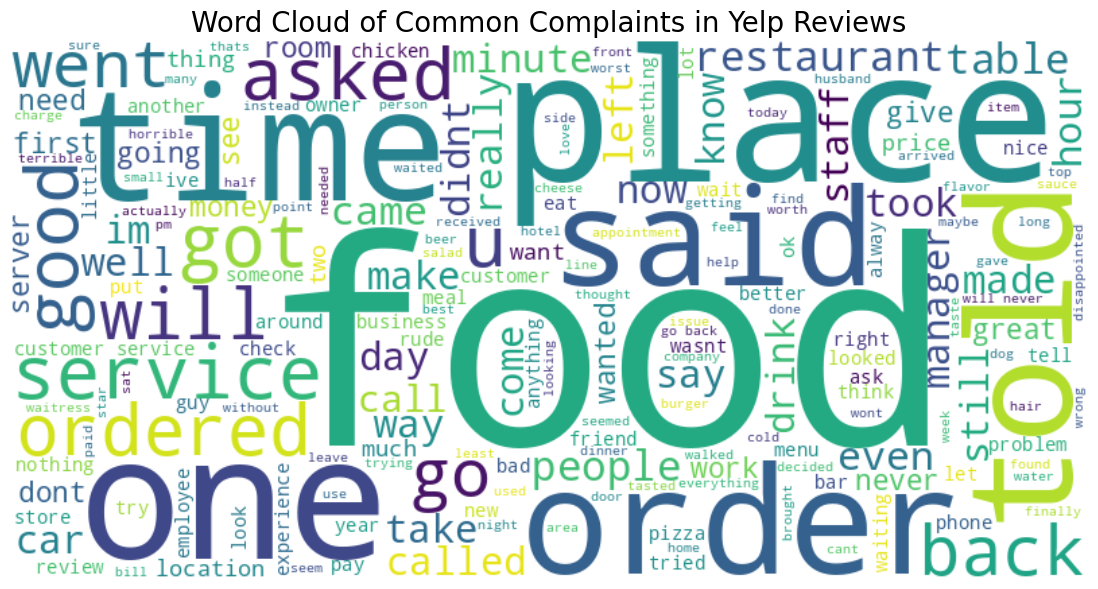

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(negative_reviews['clean_text'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Common Complaints in Yelp Reviews", fontsize=20)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(1,1), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Unigrams
unigrams = get_top_ngrams(negative_reviews['clean_text'], (1,1), 20)
# Bigrams
bigrams = get_top_ngrams(negative_reviews['clean_text'], (2,2), 20)
# Trigrams
trigrams = get_top_ngrams(negative_reviews['clean_text'], (3,3), 20)

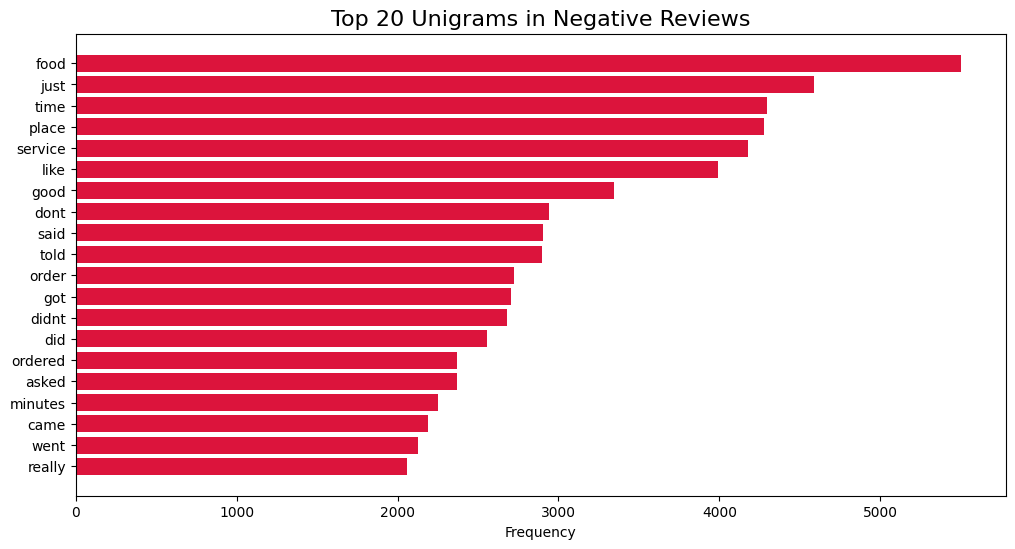

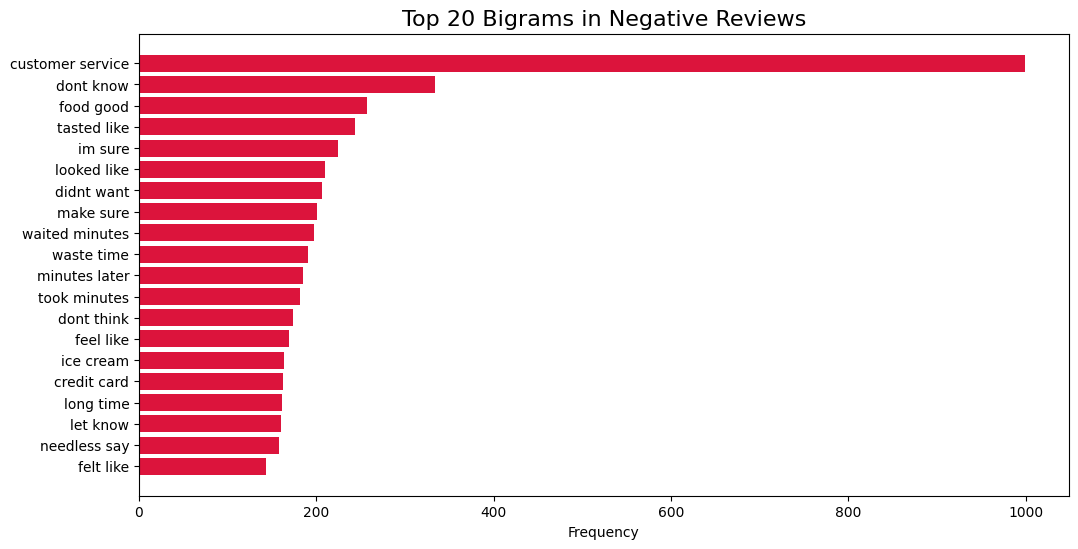

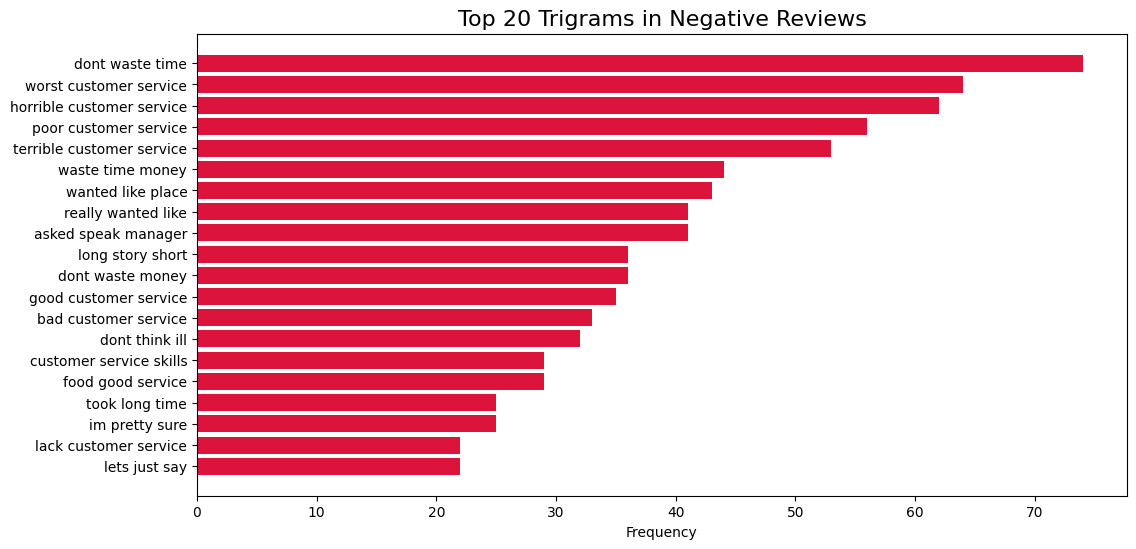

In [ ]:
def plot_ngrams(ngrams, title):
    words = [x[0] for x in ngrams]
    freqs = [x[1] for x in ngrams]

    plt.figure(figsize=(12, 6))
    plt.barh(words[::-1], freqs[::-1], color='crimson')
    plt.title(title, fontsize=16)
    plt.xlabel("Frequency")
    plt.show()

plot_ngrams(unigrams, "Top 20 Unigrams in Negative Reviews")
plot_ngrams(bigrams, "Top 20 Bigrams in Negative Reviews")
plot_ngrams(trigrams, "Top 20 Trigrams in Negative Reviews")